In [1]:
import torch
import numpy as np
from PIL import Image
from torchmetrics.regression import MeanSquaredError
import matplotlib.pyplot as plt
import imageio

/home/pg51242/Desktop/text2img-gen/text2img_dm/lib64/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

img_epochs = [695, 697, 713, 716, 717, 719, 721, 724, 728, 743, 745, 749, 755, 758, 773, 776, 780, 783, 785, 787, 803]
img_dirs = ["decoded_unet_img_ddpm_val+train_" + str(i) + ".png" for i in img_epochs]
imgs = torch.Tensor([])
for img_dir in img_dirs:
    image = Image.open(img_dir)
    image = np.array(image.convert("RGB"))
    image = image[None].transpose(0, 3, 1, 2)
    image = torch.from_numpy(image).to(dtype=torch.float32)# / 127.5 - 1.0
    imgs = torch.cat([imgs, image], dim=0)


orig = Image.open("decoded_unet_img_orig_ddpm_val+train.png")
orig = np.array(orig.convert("RGB"))
orig = orig[None].transpose(0, 3, 1, 2)
orig = torch.from_numpy(orig).to(dtype=torch.float32)[0]# / 127.5 - 1.0

imgs.shape, orig.shape

(torch.Size([21, 3, 392, 1042]), torch.Size([3, 392, 1042]))

In [4]:
diffs = []
percep_diffs = []
mse = MeanSquaredError()
for i in range(len(imgs)):
    diffs.append(mse(imgs[i], imgs[-1]))
    percep_diffs.append(imgs[i] - imgs[-1])
print(imgs[-1].shape, orig.shape)
# diffs.append(mse(imgs[-1], orig))
percep_diffs.append(imgs[-1] - orig)
diffs, len(percep_diffs)

torch.Size([3, 392, 1042]) torch.Size([3, 392, 1042])


([tensor(454.2779),
  tensor(432.2105),
  tensor(471.5865),
  tensor(436.3471),
  tensor(450.2235),
  tensor(422.7125),
  tensor(422.3715),
  tensor(68.9825),
  tensor(66.8039),
  tensor(55.6892),
  tensor(53.5973),
  tensor(55.6499),
  tensor(44.7475),
  tensor(45.5348),
  tensor(36.8346),
  tensor(36.0914),
  tensor(33.4583),
  tensor(30.5474),
  tensor(30.8534),
  tensor(31.2971),
  tensor(0.)],
 22)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

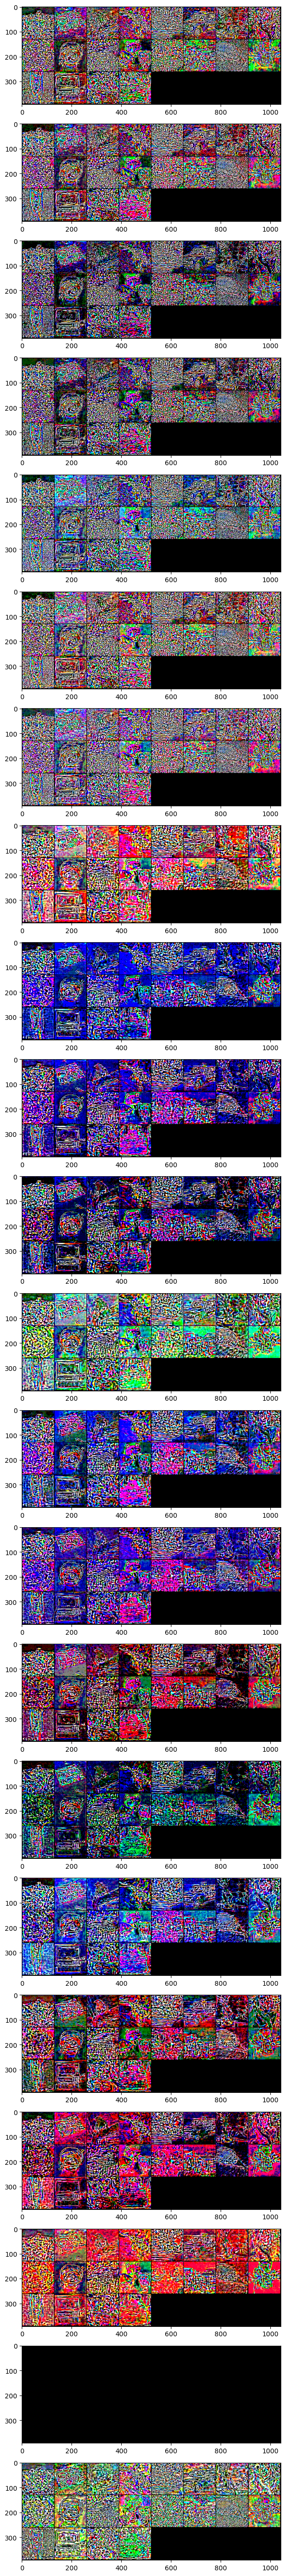

In [5]:

fig = plt.figure(figsize = (20, 70))

for r in range(len(percep_diffs)):
    ax1 = fig.add_subplot(len(percep_diffs), 1, r+1)
    plt.imshow(percep_diffs[r].permute(1, 2, 0))
    # plt.imshow(percep_diffs[r][1].permute(0, 1))
    # if r == len(percep_diffs)-1:  break
    # ax2 = fig.add_subplot(4, 2, (r)+2)
    # plt.imshow(percep_diffs[r+1].permute(1, 2, 0)**2)

In [7]:
imgs.shape

torch.Size([15, 3, 392, 1042])

In [6]:
images = []
for filename in img_dirs:
    images.append(imageio.imread(filename))
imageio.mimsave('model_evol_695_803.gif', images)

/tmp/ipykernel_3400589/934894124.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))
